# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
# write your code here

from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
task_one = pd.read_csv('/content/5_a.csv')
#ypred=[0 if y_score < 0.5 else 1]
task_one['y'] = task_one['y'].astype(int)
task_one['P'] = (task_one['proba'] >= 0.5).astype(int)
task_one.head()

,y,proba,P
0,1,0.637387,1
1,1,0.635165,1
2,1,0.766586,1
3,1,0.724564,1
4,1,0.889199,1


In [ ]:
def compute_All(Actual,Predicted):

  TP = np.sum((Actual==1) & (Predicted==1))
  TN = np.sum((Actual==0) & (Predicted==0))
  FN = np.sum((Actual==1) & (Predicted==0))
  FP = np.sum((Actual==0) & (Predicted==1))

  Accuracy = ((TP+TN)/float(TP+TN+FP+FN))*100

  Precision = (TP/(FP+TP))*100
  Recall = (TP/(TP+FN))*100

  F1_Score = 2 * ((Precision*Recall)/(Precision+Recall))

  return TP,TN,FN,FP,Accuracy,F1_Score

TP,TN,FN,FP,Accuracy,F1_Score = compute_All(task_one['y'], task_one['P'])

print('Confusion Matrix:')
print('True Positive',TP)
print('True Negative',TN)
print('False Positive',FP)
print('False Negative',FN)
print('***************************')
print('Accuarcy of task A:',Accuracy)
print('F1_Score of Task A:',F1_Score)

Confusion Matrix:
True Positive 10000
True Negative 0
False Positive 100
False Negative 0
***************************
Accuarcy of task A: 99.00990099009901
F1_Score of Task A: 99.50248756218905


In [ ]:
def roc_curve(actual,probability,thresholds):
    FPR = []
    TPR = []
    
    for threshold in thresholds:
        threshold = round(threshold,2)
        predicted = np.where(probability >= threshold, 1, 0) #for each threshold value we are predicting class-label of y
        
        #Computing Confusion Matrix
        tp = np.sum((predicted == 1) & (actual == 1))
        tn = np.sum((predicted == 0) & (actual == 0))
        fp = np.sum((predicted == 1) & (actual == 0))
        fn = np.sum((predicted == 0) & (actual == 1))

        #Computing TPR & FPR based on the formulae
        FPR.append(fp / (fp + tn))
        TPR.append(tp / (tp + fn))
        
    return [FPR,TPR]

FPR, TPR= roc_curve(task_one['y'],task_one['proba'],thresholds = np.sort(np.arange(0.0,1.01,0.1))[::-1])
FPR_array = np.asarray(FPR)
TPR_array = np.asarray(TPR)

AUC_A = np.trapz(TPR_array,FPR_array)
print('Area Under the Curve:', AUC_A)

Area Under the Curve: 0.48897750000000006


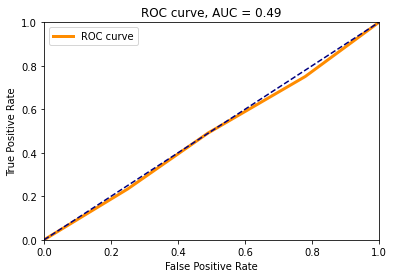

In [ ]:
#Plotting the below ROC Curve just for reference
import matplotlib.pyplot as plt
plt.plot(FPR, TPR,color='darkorange',lw= 3,label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%AUC_A)
plt.legend()
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
# write your code
task_two = pd.read_csv('/content/5_b.csv')

#ypred=[0 if y_score < 0.5 else 1]
task_two['y'] = task_two['y'].astype(int)
task_two['P'] = (task_two['proba'] >= 0.5).astype(int)
task_two.head()

,y,proba,P
0,0,0.281035,0
1,0,0.465152,0
2,0,0.352793,0
3,0,0.157818,0
4,0,0.276648,0


In [ ]:
def compute_All(Actual,Predicted):

  TP = np.sum((Actual==1) & (Predicted==1))
  TN = np.sum((Actual==0) & (Predicted==0))
  FN = np.sum((Actual==1) & (Predicted==0))
  FP = np.sum((Actual==0) & (Predicted==1))

  Accuracy = ((TP+TN)/float(TP+TN+FP+FN))*100

  Precision = (TP/(FP+TP))*100
  Recall = (TP/(TP+FN))*100

  F1_Score = 2 * ((Precision*Recall)/(Precision+Recall))

  return TP,TN,FN,FP,Accuracy,F1_Score

TP,TN,FN,FP,Accuracy,F1_Score = compute_All(task_two['y'], task_two['P'])

print('Confusion Matrix:')
print('True Positive',TP)
print('True Negative',TN)
print('False Positive',FP)
print('False Negative',FN)
print('***************************')
print('Accuarcy of task B:',Accuracy)
print('F1_Score of Task B:',F1_Score)


Confusion Matrix:
True Positive 55
True Negative 9761
False Positive 239
False Negative 45
***************************
Accuarcy of task B: 97.18811881188118
F1_Score of Task B: 27.918781725888326


In [ ]:
def roc_curve(actual,probability,thresholds):
    FPR = []
    TPR = []
    
    for threshold in thresholds:
        threshold = round(threshold,2)
        predicted = np.where(probability >= threshold, 1, 0) #for each threshold value we are predicting class-label of y
        
        #Computing Confusion Matrix
        tp = np.sum((predicted == 1) & (actual == 1))
        tn = np.sum((predicted == 0) & (actual == 0))
        fp = np.sum((predicted == 1) & (actual == 0))
        fn = np.sum((predicted == 0) & (actual == 1))

        #Computing TPR & FPR based on the formulae
        FPR.append(fp / (fp + tn))
        TPR.append(tp / (tp + fn))
        
    return [FPR,TPR]

FPR_2, TPR_2= roc_curve(task_two['y'],task_two['proba'],thresholds=np.sort(np.arange(0.0,1.01,0.1))[::-1])
FPR_arr = np.asarray(FPR_2)
TPR_arr = np.asarray(TPR_2)
AUC = np.trapz(TPR_arr, FPR_arr)
print('Area Under the Curve:', AUC)

Area Under the Curve: 0.9276825


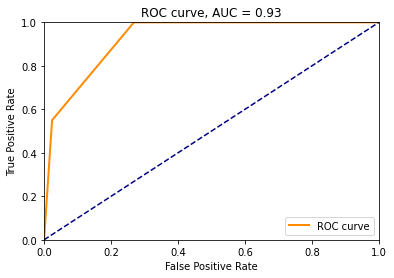

In [ ]:
#Plotting the below ROC Curve just for reference
import matplotlib.pyplot as plt
plt.plot(FPR_2, TPR_2, color='darkorange', lw = 2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%AUC)
plt.legend()
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [2]:
task_three = pd.read_csv('/content/5_c.csv')
task_three['P'] = (task_three['prob'] >= 0.5).astype(int)
task_three.head()

,y,prob,P
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0


In [9]:
def roc_curve(actual,probability,thresholds):
    A = []
    for threshold in thresholds:
        threshold = round(threshold,2)
        predicted = np.where(probability >= threshold, 1, 0) #for each threshold value we are predicting class-label of y
        
        #Computing FP and FN and calculating value a based on formula
        fp = np.sum((predicted == 1) & (actual == 0))
        fn = np.sum((predicted == 0) & (actual == 1))
        a = 500 * fn + 100 * fp
        A.append([a, threshold])
        Low_thres_Value_A = min(A)
    return A,Low_thres_Value_A

A,Low_thres_Value_A = roc_curve(task_three['y'],task_three['prob'],thresholds=np.sort(np.arange(0.0,1.01,0.01))[::-1])
print(A)
print('Lowest Value of A = {0} and best theshold = {1}'.format(Low_thres_Value_A[(0)],Low_thres_Value_A[1]))

[[523500, 1.0], [523500, 0.99], [523500, 0.98], [523500, 0.97], [523500, 0.96], [522500, 0.95], [521000, 0.94], [521000, 0.93], [520500, 0.92], [517500, 0.91], [514500, 0.9], [509500, 0.89], [507500, 0.88], [504600, 0.87], [502100, 0.86], [497100, 0.85], [491600, 0.84], [483700, 0.83], [479700, 0.82], [475800, 0.81], [469900, 0.8], [465400, 0.79], [461400, 0.78], [457000, 0.77], [455100, 0.76], [447700, 0.75], [440900, 0.74], [438500, 0.73], [433400, 0.72], [430000, 0.71], [424100, 0.7], [412700, 0.69], [405800, 0.68], [395100, 0.67], [386400, 0.66], [378800, 0.65], [369200, 0.64], [362400, 0.63], [355600, 0.62], [347100, 0.61], [338600, 0.6], [330100, 0.59], [323300, 0.58], [314400, 0.57], [300300, 0.56], [292100, 0.55], [285900, 0.54], [277800, 0.53], [267700, 0.52], [256600, 0.51], [247800, 0.5], [240500, 0.49], [234800, 0.48], [226000, 0.47], [218900, 0.46], [213600, 0.45], [205500, 0.44], [198400, 0.43], [192500, 0.42], [190100, 0.41], [187900, 0.4], [182500, 0.39], [178100, 0.38]

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
task_four = pd.read_csv('/content/5_d.csv')
task_four.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [ ]:
def compute_All_task_4(actual,predicted):
  MSE = np.square(np.subtract(actual,predicted)).mean()

  error = abs(np.subtract(actual,predicted))
  MAPE = ((error/np.mean(actual)).mean())*100

  SST = np.sum(np.square((np.subtract(actual,(np.mean(actual))))))
  SSR = np.sum(np.square(np.subtract(actual,predicted)))
  COD = 1-(SSR/SST)

  return MSE,MAPE,COD

MSE,MAPE,COD = compute_All_task_4(task_four['y'], task_four['pred'])

print('Mean Square Error:', MSE)
print('************************')
print('Mean Absolute Percentage Error:',MAPE)
print('************************')
print('COD or R^2:',COD)

Mean Square Error: 177.16569974554707
************************
Mean Absolute Percentage Error: 12.912029940096314
************************
COD or R^2: 0.9563582786990937
